# **HOMEWORK 4**
---

**Goal:** Build a multilayer perceptron (MLP) model & for classifying SVHN dataset.

**Dataset:** SVHN, 32x32 RGB number images.        
http://ufldl.stanford.edu/housenumbers/

---

###**Instructions**             
**1)** **Preprocessing**  
> **1.1)** Load the dataset                 
> **1.2)** Normalize features                
  **1.3)** Visualize dataset

**2)** **Modelling**
> **2.1)** Try different fully hyperparameters (# of hidden layers, learning rate, # of epochs, # of neurons, add dropout, etc.)             
> **2.2)** Train with early stopping

**3)** **Report**                   
Share your results, which hyperparameters you used, train & test accuracy, etc. 
Write an at most 1/2-page summary of your approach to this problem at the end of your notebook; this should be like an executive summary. Include problem definition and preprocessing as well.


> **Topics to Discuss:**                                      
Explain you results.           
How did you choose the best hyperparameters?                         
What happened when the # of epochs are too large/small, why?                  
What happened when the learning rate is too large/small, why?              
What did you observe when you change the # of hidden layers?                
What did you observe when you change the # of neurons?   
What is the use of adding dropout?                     
What is the use of early stopping? 


---


**Note:** Don't forget to change Colab's runtime to GPU.







#1) Preprocessing
Load, normalize and visualize data


---





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load SVHN dataset
from scipy.io import loadmat
import numpy as np
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('/content/drive/My Drive/train_32x32.mat')
X_test, y_test = load_data('/content/drive/My Drive/test_32x32.mat')


# Summarize dataset (count, shape, min/max value)
print('Shape of train data: ',X_train.shape, ' and there are ',X_train.shape[3],' instances. Also, maximum and minimum values of train data are ',max(y_train),' and ', min(y_train) )
print('Shape of test data: ',X_test.shape, ' and there are ',X_test.shape[3],' instances. Also, maximum and minimum values of train data are ',max(y_test),' and ', min(y_test))

Shape of train data:  (32, 32, 3, 73257)  and there are  73257  instances. Also, maximum and minimum values of train data are  [10]  and  [1]
Shape of test data:  (32, 32, 3, 26032)  and there are  26032  instances. Also, maximum and minimum values of train data are  [10]  and  [1]


In [ ]:
#Change input shape

X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)


In [ ]:
print('Shape of train data: ',X_train.shape)
print('Shape of test data: ',X_test.shape)

Shape of train data:  (73257, 32, 32, 3)
Shape of test data:  (26032, 32, 32, 3)


In [ ]:
X_train_normalized = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test_normalized = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3])

print('shape of train is: ', X_train_normalized.shape)
print('shape of test is: ', X_test_normalized.shape)

shape of train is:  (73257, 3072)
shape of test is:  (26032, 3072)


In [ ]:
# Normalize dataset
X_train_normalized = X_train_normalized.astype('float32')
X_test_normalized = X_test_normalized.astype('float32')
X_train_normalized /= 255
X_test_normalized /= 255

In [ ]:
print('final shape of train is: ', X_train_normalized.shape)
print('final shape of test is: ', X_test_normalized.shape)

final shape of train is:  (73257, 3072)
final shape of test is:  (26032, 3072)


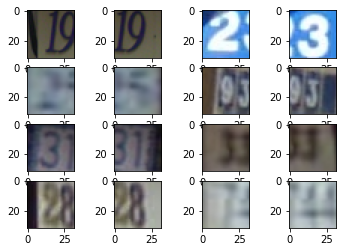

In [ ]:
# Visualize some samples
numberofsamples = 16
import matplotlib.pyplot as plt
for i in range(numberofsamples):
  plt.subplot(numberofsamples /4,4, i+1)
  plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
plt.show()


#2) Modelling
(Build, compile, fit, evaluate)


---



##2.1) Part 1

---



In [ ]:
# Build the model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model.add(Dense(128,activation='relu', name= 'hiddenlayer2'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 512)               1573376   
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 11)                1419      
Total params: 1,640,459
Trainable params: 1,640,459
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile & fit the model 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics =['accuracy'])

fitted = model.fit(X_train_normalized, y_train, batch_size= 256, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
229/229 [==============================] - 24s 44ms/step - loss: 2.3654 - accuracy: 0.1665 - val_loss: 2.1966 - val_accuracy: 0.2118
Epoch 2/10
229/229 [==============================] - 10s 42ms/step - loss: 2.1641 - accuracy: 0.2243 - val_loss: 1.9020 - val_accuracy: 0.3506
Epoch 3/10
229/229 [==============================] - 10s 42ms/step - loss: 1.7414 - accuracy: 0.4027 - val_loss: 1.4781 - val_accuracy: 0.5161
Epoch 4/10
229/229 [==============================] - 10s 42ms/step - loss: 1.4237 - accuracy: 0.5360 - val_loss: 1.3059 - val_accuracy: 0.5905
Epoch 5/10
229/229 [==============================] - 10s 42ms/step - loss: 1.2187 - accuracy: 0.6176 - val_loss: 1.1844 - val_accuracy: 0.6268
Epoch 6/10
229/229 [==============================] - 10s 42ms/step - loss: 1.1113 - accuracy: 0.6567 - val_loss: 1.0934 - val_accuracy: 0.6620
Epoch 7/10
229/229 [==============================] - 10s 42ms/step - loss: 1.0382 - accuracy: 0.6827 - val_loss: 1.0089 - val_accuracy:

In [ ]:
# Evaluate the model on test data
score =model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])


Test loss:  1.0177432298660278
Test accuracy:  0.7013675570487976


In [ ]:
# Try different hyperparameters and observe the results
#different batch size = 128
model = Sequential()
model.add(Dense(512,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model.add(Dense(128,activation='relu', name= 'hiddenlayer2'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics =['accuracy'])
fitted2 = model.fit(X_train_normalized, y_train, batch_size= 128, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
458/458 [==============================] - 13s 27ms/step - loss: 2.3983 - accuracy: 0.1686 - val_loss: 2.1672 - val_accuracy: 0.2249
Epoch 2/10
458/458 [==============================] - 12s 27ms/step - loss: 1.9660 - accuracy: 0.3050 - val_loss: 1.4474 - val_accuracy: 0.5416
Epoch 3/10
458/458 [==============================] - 13s 27ms/step - loss: 1.3665 - accuracy: 0.5646 - val_loss: 1.1939 - val_accuracy: 0.6381
Epoch 4/10
458/458 [==============================] - 13s 27ms/step - loss: 1.1657 - accuracy: 0.6333 - val_loss: 1.1694 - val_accuracy: 0.6333
Epoch 5/10
458/458 [==============================] - 12s 26ms/step - loss: 1.0954 - accuracy: 0.6594 - val_loss: 1.0936 - val_accuracy: 0.6529
Epoch 6/10
458/458 [==============================] - 12s 27ms/step - loss: 1.0291 - accuracy: 0.6814 - val_loss: 1.0269 - val_accuracy: 0.6859
Epoch 7/10
458/458 [==============================] - 12s 27ms/step - loss: 0.9824 - accuracy: 0.6984 - val_loss: 1.0052 - val_accuracy:

In [ ]:
score =model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

Test loss:  0.9869659543037415
Test accuracy:  0.7058620452880859


In [ ]:
#different batch size = 256 & learning rate = 0.01 instead of 0.001
model = Sequential()
model.add(Dense(512,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model.add(Dense(128,activation='relu', name= 'hiddenlayer2'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics =['accuracy'])
fitted3 = model.fit(X_train_normalized, y_train, batch_size= 256, epochs=10, validation_split=0.2, verbose=1)
score =model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
229/229 [==============================] - 10s 42ms/step - loss: 7.9003 - accuracy: 0.1589 - val_loss: 2.2364 - val_accuracy: 0.1875
Epoch 2/10
229/229 [==============================] - 9s 40ms/step - loss: 2.2387 - accuracy: 0.1904 - val_loss: 2.2286 - val_accuracy: 0.1875
Epoch 3/10
229/229 [==============================] - 9s 40ms/step - loss: 2.2292 - accuracy: 0.1880 - val_loss: 2.2142 - val_accuracy: 0.1876
Epoch 4/10
229/229 [==============================] - 9s 41ms/step - loss: 2.1981 - accuracy: 0.1954 - val_loss: 2.0847 - val_accuracy: 0.2558
Epoch 5/10
229/229 [==============================] - 9s 40ms/step - loss: 2.0289 - accuracy: 0.2754 - val_loss: 1.9341 - val_accuracy: 0.3179
Epoch 6/10
229/229 [==============================] - 9s 41ms/step - loss: 1.7823 - accuracy: 0.3782 - val_loss: 1.6762 - val_accuracy: 0.4294
Epoch 7/10
229/229 [==============================] - 9s 41ms/step - loss: 1.6353 - accuracy: 0.4449 - val_loss: 1.5996 - val_accuracy: 0.463

##Best batch size can be  256. However, Learning rate must be evaluated at higher epocs.

In [ ]:
#add more hidden layers with increasing the neuron number because i think my model underfitted to train data and i want to make it more complex  
model2 = Sequential()
model2.add(Dense(1028,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model2.add(Dense(512,activation='relu', name= 'hiddenlayer2'))
model2.add(Dense(128,activation='relu', name= 'hiddenlayer3'))
model2.add(Dense(11,activation='softmax', name= 'output_layer'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 1028)              3159044   
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 512)               526848    
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 11)                1419      
Total params: 3,752,975
Trainable params: 3,752,975
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics =['accuracy'])

fitted4 = model2.fit(X_train_normalized, y_train, batch_size= 256, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
229/229 [==============================] - 22s 94ms/step - loss: 2.4121 - accuracy: 0.1649 - val_loss: 2.1511 - val_accuracy: 0.2322
Epoch 2/10
229/229 [==============================] - 21s 92ms/step - loss: 2.0519 - accuracy: 0.2689 - val_loss: 1.5468 - val_accuracy: 0.4944
Epoch 3/10
229/229 [==============================] - 21s 92ms/step - loss: 1.4156 - accuracy: 0.5336 - val_loss: 1.1818 - val_accuracy: 0.6275
Epoch 4/10
229/229 [==============================] - 21s 93ms/step - loss: 1.1430 - accuracy: 0.6386 - val_loss: 1.1138 - val_accuracy: 0.6422
Epoch 5/10
229/229 [==============================] - 21s 93ms/step - loss: 1.0270 - accuracy: 0.6794 - val_loss: 1.0089 - val_accuracy: 0.6843
Epoch 6/10
229/229 [==============================] - 21s 93ms/step - loss: 0.9280 - accuracy: 0.7151 - val_loss: 0.9220 - val_accuracy: 0.7144
Epoch 7/10
229/229 [==============================] - 21s 93ms/step - loss: 0.8649 - accuracy: 0.7320 - val_loss: 0.9300 - val_accuracy:

In [ ]:
score =model2.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

Test loss:  0.8823224306106567
Test accuracy:  0.7387446165084839


##This is clearly better. As a last thing, i will train the model more to make it more complex. Then, i will compare the learning rate outcomes.

In [ ]:
model = Sequential()
model.add(Dense(1028,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model.add(Dense(512,activation='relu', name= 'hiddenlayer2'))
model.add(Dense(128,activation='relu', name= 'hiddenlayer3'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics =['accuracy'])

fitted4 = model.fit(X_train_normalized, y_train, batch_size= 256, epochs=30, validation_split=0.2, verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 1028)              3159044   
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 512)               526848    
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 11)                1419      
Total params: 3,752,975
Trainable params: 3,752,975
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
229/229 [==============================] - 23s 98ms/step - loss: 2.5174 - accuracy: 0.1697 - val_loss: 2.1486 - val_accuracy: 0.2388
Epoch 2/30
229/229 [==============================] - 22s 97ms/step - loss: 2.0855 - accuracy: 0.2

In [ ]:
score =model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

Test loss:  0.7691133618354797
Test accuracy:  0.7854948043823242


In [ ]:
model = Sequential()
model.add(Dense(1028,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model.add(Dense(512,activation='relu', name= 'hiddenlayer2'))
model.add(Dense(128,activation='relu', name= 'hiddenlayer3'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics =['accuracy'])

fitted4 = model.fit(X_train_normalized, y_train, batch_size= 256, epochs=30, validation_split=0.2, verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 1028)              3159044   
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 512)               526848    
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 11)                1419      
Total params: 3,752,975
Trainable params: 3,752,975
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
229/229 [==============================] - 22s 92ms/step - loss: 2.2925 - accuracy: 0.1724 - val_loss: 2.0932 - val_accuracy: 0.2439
Epoch 2/30
229/229 [==============================] - 21s 91ms/step - loss: 1.9274 - accuracy: 0.3

##2.2) Part 2


---



When training a model, model stops generalizing after a while and learns noices of the datapoints as well. One way to avoid this **overfitting** is to use **early stopping**. With early stopping, model performance is monitored on validation data in each epoch and stops updating weights when validation performance starts decreasing.

https://keras.io/api/callbacks/early_stopping/

![picture](https://drive.google.com/uc?id=1Rs8FkpVgifspzvlIfdTDYyBVjR01OgVj)

In [ ]:
# Build & compile the model
model = Sequential()
model.add(Dense(1028,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model.add(Dense(512,activation='relu', name= 'hiddenlayer2'))
model.add(Dense(128,activation='relu', name= 'hiddenlayer3'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics =['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 1028)              3159044   
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 512)               526848    
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 11)                1419      
Total params: 3,752,975
Trainable params: 3,752,975
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Aim is to stop when minimum validation loss is achieved
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10,verbose=1, mode='min',restore_best_weights=True) # Training will stop when minimum validation loss is achieved

model.fit(X_train_normalized, y_train, batch_size= 256, epochs=100, validation_split=0.2, # you can have large epoch size since it will stop when best validation loss is achieved
                              callbacks=[es], verbose=1)

Epoch 1/100
229/229 [==============================] - 23s 96ms/step - loss: 2.4238 - accuracy: 0.1663 - val_loss: 2.1497 - val_accuracy: 0.2135
Epoch 2/100
229/229 [==============================] - 21s 93ms/step - loss: 2.0187 - accuracy: 0.2797 - val_loss: 1.5953 - val_accuracy: 0.4749
Epoch 3/100
229/229 [==============================] - 22s 95ms/step - loss: 1.4673 - accuracy: 0.5135 - val_loss: 1.2265 - val_accuracy: 0.5993
Epoch 4/100
229/229 [==============================] - 22s 95ms/step - loss: 1.1750 - accuracy: 0.6222 - val_loss: 1.0991 - val_accuracy: 0.6554
Epoch 5/100
229/229 [==============================] - 21s 93ms/step - loss: 1.0391 - accuracy: 0.6775 - val_loss: 0.9863 - val_accuracy: 0.6934
Epoch 6/100
229/229 [==============================] - 21s 92ms/step - loss: 0.9603 - accuracy: 0.7026 - val_loss: 0.9578 - val_accuracy: 0.7026
Epoch 7/100
229/229 [==============================] - 21s 93ms/step - loss: 0.8930 - accuracy: 0.7219 - val_loss: 0.8789 - val_ac

![picture](https://drive.google.com/uc?id=1Mp2W2VVQVmyuleSDNDKJLI6hxAtyG5gx)

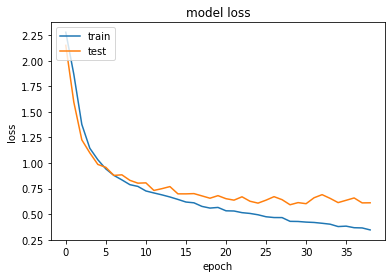

In [ ]:
#Plot train & validation loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluate on test data
score =model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

Test loss:  0.7088384628295898
Test accuracy:  0.8049324154853821


#3) Report


---

Summary of models you try (learning rate, # of hidden layers, # of epochs, test accuracy, etc.) Write a short report & discuss the results of the models you trained

Firstly, i tried different batch sizes such as 32,128,256 and these tests showed us that best result can be achieved by batch_size = 128 and the results are Test loss=  1.0041226148605347 and Test accuracy=  0.7022510766983032.

Secondly, i added more hidden layers and increased the number of neurons because i thought my model underfitted to train data and i wanted to make it more complex. I added one more layer and it increased the performance up to values of test loss=  0.8760575652122498 and test accuracy=  0.7392055988311768. 


Then, i set the epoch as 30 and trained my model more. More training effected to the training and test results directly and it increased the test result up to: Test loss:  0.8121813535690308 and Test accuracy:  0.7732406258583069. So, number of epochs is one of the major factors for improvement of my model because if it is too lowö then model stays underfitted. On the other hand if it is too highö the model becomes overfitted as we see in the earlystopping conditions.

Thirdly, i tried to add dropout to my model but i think i did something wrong. When i use the dropout functions, my model was like resetting the learning at each epoch. So, i removed this part.

Finally, i used earlystopping nethod to prevent overfitting. When i increased the number of epochs, i observed that validation data accuracy sometimes did not improved but train accuracy score was increasing because of repeated trainings. So, i was worried about overfitting my model. Then, earlystopping method showed us that after 24th epoch, my model does not improve and it starts to overfitting.

The final scores are;


Test loss:  0.761054515838623


Test accuracy:  0.7805009484291077




Initial scores were;


Test loss:  1.01712167263031


Test accuracy:  0.7020590305328369




---


**Dropout** : [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a regularization approach. At each training stage, specified percent of individual nodes are dropped out of the network.

[Read](https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/) MLP Dropout Regularization for further information

![picture](https://drive.google.com/uc?id=12lv5VsPFLt6sKEZvgQRyQ7mHeW4l-Vq9)

In [ ]:
from keras.layers import Dropout

In [ ]:
#Try adding dropout to the architecture 
model = Sequential()
model.add(Dense(1028,activation='relu', input_shape = (X_train_normalized.shape[1],), name= 'hiddenlayer1'))
model3.add(Dropout(0.5))
model.add(Dense(512,activation='relu', name= 'hiddenlayer2'))
model3.add(Dropout(0.5))
model.add(Dense(128,activation='relu', name= 'hiddenlayer3'))
model.add(Dense(11,activation='softmax', name= 'output_layer'))
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(), metrics =['accuracy'])


fitted4 = model.fit(X_train_normalized, y_train, batch_size= 128, epochs=100, validation_split=0.2, verbose=1)
##### i did not understand the problem, i searched and tried different codes from different sources but it never worked out corretly 
##### val accuracy always stays same and very low, i could not fix

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 1028)              3159044   
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 512)               526848    
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 11)                1419      
Total params: 3,752,975
Trainable params: 3,752,975
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
458/458 [==============================] - 28s 59ms/step - loss: 2.3763 - accuracy: 0.1728 - val_loss: 1.9610 - val_accuracy: 0.3210
Epoch 2/100
458/458 [==============================] - 26s 57ms/step - loss: 1.6463 - accuracy: 

In [ ]:
score =model.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ', score[1])

Test loss:  1.7019662857055664
Test accuracy:  0.7711662650108337
